In [1]:
from simMat_funcs import *

In [2]:
dataPath = '../OnlyStrsCode/Data/'
simMat_yr = np.load(dataPath + 'history_simMat.npy')

elemList = []
with open(f"{dataPath}/ElementList.txt",'r') as f:
    for line in f:
        elemList.append(line.strip())
            
print(simMat_yr.shape)

(300, 60, 60)


# Meaning of 0s and nans

If element exists to this year, but similarity == 0, plot 0.

If element doesn't exist, then similarity == 0, but plot nan.

## Let's produce code to convert these data, into specific plots for each element.


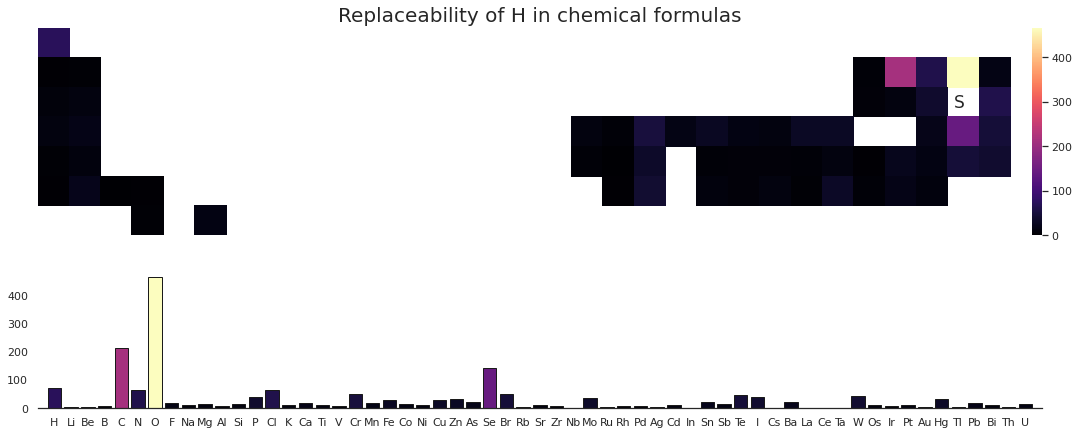

In [13]:
def plot_SimPTBar(simMat_yr,year,element,min_yr):
    # Select simMat for this year
    arr_yr = simMat_yr[year-min_yr].copy()
    # Select a particular element
    X,Y = TP[element]

    # Generate a list of elements present at the given year
    c,elems_yr = 0,[]  # counter, element list
    for e in TP.keys():
        if e in elemList:
            # If all entries at this place are nan: they don't exist
            if (~np.isnan(arr_yr[:,c].all())): 
                c+=1
                elems_yr.append(e)

    # Select the array for the given element, for the given year
    arr_thisElem = arr_yr[:,elems_yr.index(element)]
    arr_thisElem[elems_yr.index(element)] = 0  # Remove this element's value, so it's white as well

    img = np.zeros((7,32))
    mask = img.copy()
    # Create a mask to wipe out nan entries, so they appear as white
    c = 0
    for e in elems_yr:
        x,y = TP[e]
        mask[x,y] = 1
        if ~np.isnan(arr_thisElem[c]):
            img[x,y] = arr_thisElem[c]
            c+=1

    mask[X,Y] = 0
    with np.errstate(invalid='ignore',divide='ignore'):
        img /= mask

    # Plot similarity PT for elem
    fig = plt.figure(figsize=(18,7))
    gs = fig.add_gridspec(2,2,  width_ratios=(99, 1), height_ratios=(6, 4),
                  #    left=0, right=0.9, bottom=0.1, top=0.9,
                      wspace=0, hspace=0.2)

    ax = fig.add_subplot(gs[0, :])
    ax1 = fig.add_subplot(gs[1, :])
    cbar = fig.add_subplot(gs[0,1])

    cmap = sns.color_palette("magma", as_cmap=True)
    sns.heatmap(img,ax=ax,cbar_ax=cbar,
                vmin=0,vmax=np.nanmax(img),
                cmap=cmap)

    ax.set_title(f'Replaceability of H in chemical formulas', fontsize=20)

    ax.axis('off')

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    #ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    # Plot barplot
    df = (pd.Series(arr_thisElem,index=elems_yr)
          .reset_index()
          .rename(columns={'index':'Element',
                           0:'Occurences'}))
    df = df[df.Element != element]

    df['color'] = (df['Occurences']/df['Occurences'].max()).apply(cmap)
    ax1.bar(x=range(df.shape[0]) ,
            height=df['Occurences'],
            color=df['color'],edgecolor = "k")

    ax1.set_xticks(range(df.shape[0]))
    ax1.set_xticklabels(df['Element'])
    ax1.set_xlim(-1,df.shape[0])

    # Put the element's symbol at it's position
    if len(element)==1:  tab = 0.2
    else:                tab = 0.02
    ax.text(Y+tab,X+0.7,element,fontsize=17)
    
plot_SimPTBar(simMat_yr,1999,'S',1700)

# Plot similarity matrices for a given year.

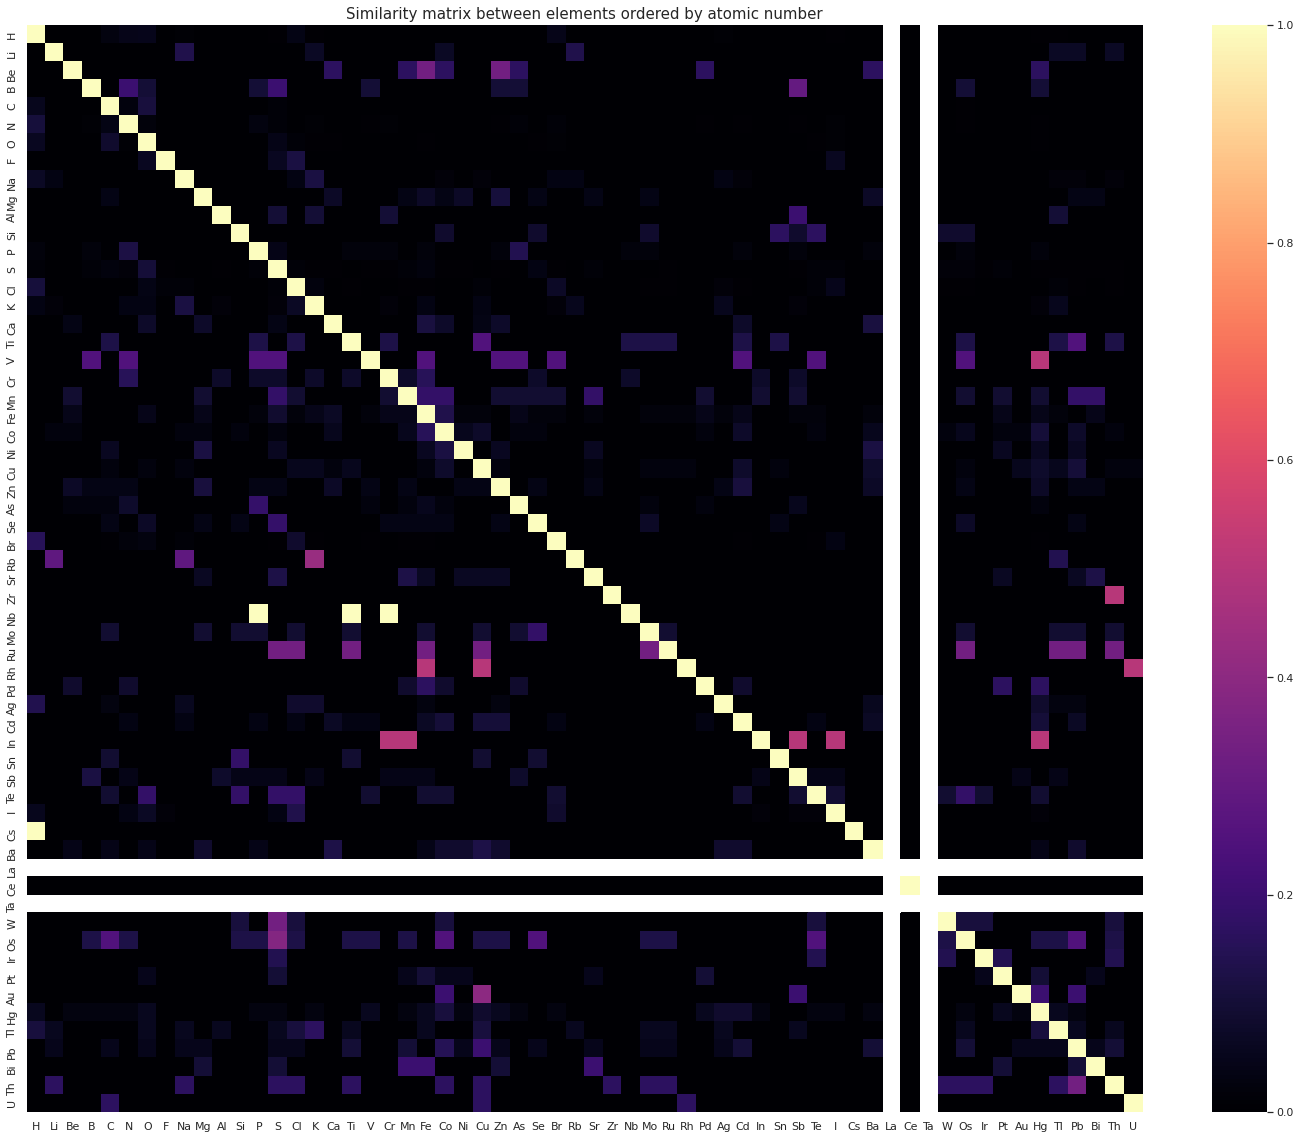

In [10]:
def plot_simMat_yr(year,min_yr):          
    diag = np.diag(simMat_yr[year - min_yr])
    with np.errstate(invalid='ignore',divide='ignore'):
        m = simMat_yr[year - min_yr]/diag
        m = m.T/(diag!=0)

    fig,ax = plt.subplots(figsize=(25,20))
    ax.set_title("Similarity matrix between elements ordered by atomic number",fontsize=15)
    sns.heatmap(m,ax=ax,
                cmap=sns.color_palette("magma", as_cmap=True))
    labl = [e for e in TP.keys() if e in elemList]
    ax.set_xticklabels(labl)
    ax.set_yticklabels(labl)
    
plot_simMat_yr(1750,1700)